# AUC Walkthrough

In [10]:
# Documentation example

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
roc_auc_score(y, clf.predict_proba(X)[:, 1])

0.9946488029173934

In [11]:
roc_auc_score(y, clf.decision_function(X))

0.9946488029173934

In [48]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


In [37]:

y_test[:, i]

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0])

In [38]:
y_score[:, i]

array([ 0.12386354, -0.16612302, -0.32055874,  0.02199789, -0.71889214,
       -0.05859016, -0.79111998, -0.57199363, -0.38933694, -0.27510839,
       -0.27995197,  0.02530178, -0.13456902, -0.45918364, -0.20023832,
       -0.56980985, -0.24297128, -0.31370595, -0.39090964,  0.03129167,
       -0.21423788, -0.51922684,  0.04121338, -0.41072849, -0.12051204,
       -0.57704892, -0.86493066, -0.21682409, -0.49997476, -0.11058011,
       -0.22759345,  0.02046723, -0.45379557, -0.00375631,  0.10106561,
       -0.34020065, -0.41776502,  0.12967625, -0.54610377, -0.35901924,
       -0.30065047, -0.181261  ,  0.00856393, -0.2292247 , -0.2039252 ,
       -0.05831557, -0.01186087,  0.21326435, -0.23302033,  0.58423201,
       -0.39404258, -0.32086131,  0.00767521, -0.50550427, -0.21298739,
       -0.10551977, -0.30613086, -0.07455313, -0.27802284, -0.21662877,
       -0.28317657, -0.47754831, -0.3755452 , -0.10238744, -0.1693745 ,
       -0.3995789 , -0.12075396,  0.41477557, -0.44616888, -0.35

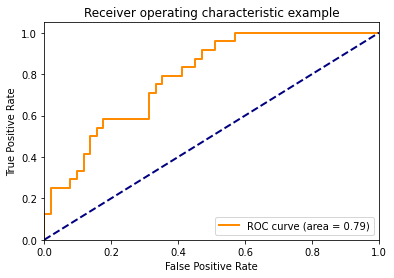

In [13]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [9]:
fpr

{0: array([0.        , 0.        , 0.        , 0.01851852, 0.01851852,
        0.03703704, 0.03703704, 0.05555556, 0.05555556, 0.07407407,
        0.07407407, 0.09259259, 0.09259259, 0.12962963, 0.12962963,
        0.14814815, 0.14814815, 0.2037037 , 0.2037037 , 0.27777778,
        0.27777778, 1.        ]),
 1: array([0.        , 0.        , 0.        , 0.02222222, 0.02222222,
        0.11111111, 0.11111111, 0.17777778, 0.17777778, 0.2       ,
        0.2       , 0.24444444, 0.24444444, 0.26666667, 0.26666667,
        0.37777778, 0.37777778, 0.42222222, 0.42222222, 0.48888889,
        0.48888889, 0.55555556, 0.55555556, 0.62222222, 0.62222222,
        0.64444444, 0.64444444, 0.66666667, 0.66666667, 0.73333333,
        0.73333333, 0.75555556, 0.75555556, 0.88888889, 0.88888889,
        1.        ]),
 2: array([0.        , 0.        , 0.        , 0.01960784, 0.01960784,
        0.07843137, 0.07843137, 0.09803922, 0.09803922, 0.11764706,
        0.11764706, 0.1372549 , 0.1372549 , 0.15686

In [10]:
tpr

{0: array([0.        , 0.04761905, 0.14285714, 0.14285714, 0.19047619,
        0.19047619, 0.33333333, 0.33333333, 0.38095238, 0.38095238,
        0.61904762, 0.61904762, 0.66666667, 0.66666667, 0.76190476,
        0.76190476, 0.9047619 , 0.9047619 , 0.95238095, 0.95238095,
        1.        , 1.        ]),
 1: array([0.        , 0.03333333, 0.13333333, 0.13333333, 0.16666667,
        0.16666667, 0.2       , 0.2       , 0.26666667, 0.26666667,
        0.33333333, 0.33333333, 0.4       , 0.4       , 0.43333333,
        0.43333333, 0.5       , 0.5       , 0.56666667, 0.56666667,
        0.6       , 0.6       , 0.63333333, 0.63333333, 0.7       ,
        0.7       , 0.73333333, 0.73333333, 0.9       , 0.9       ,
        0.93333333, 0.93333333, 0.96666667, 0.96666667, 1.        ,
        1.        ]),
 2: array([0.        , 0.04166667, 0.125     , 0.125     , 0.25      ,
        0.25      , 0.29166667, 0.29166667, 0.33333333, 0.33333333,
        0.41666667, 0.41666667, 0.5       , 0.5    

# My Implementation

In [56]:
from module4.ebc_scoring import EBCScoring
from module4.auc import AUC

In [57]:
a = AUC()
trials, seed_test_sets = a.ingest_data()

In [58]:
testset2 = seed_test_sets[2][1]
ground_truth = dict(zip(testset2['Drug-Gene'], testset2['DrugBank']))
in_drugbank = {i.replace("/",","): j for i, j in ground_truth.items() if j}
in_drugbank

{'(riluzole,cyp1a2)': True,
 '(dapsone,cyp2c9)': True,
 '(theophylline,cyp2e1)': True,
 '(ciprofloxacin,parc)': True,
 '(aripiprazole,cyp3a4)': True,
 '(troglitazone,cyp1a1)': True,
 '(trimetrexate,dhfr)': True,
 '(rosiglitazone,pparg)': True,
 '(alemtuzumab,cd52)': True,
 '(flurbiprofen,cyp2c9)': True,
 '(fluvoxamine,cyp3a4)': True,
 '(terfenadine,cyp3a4)': True}

In [59]:
# Getting the ROC curve for 1 trial
test = trials[2]

# Getting lowest and highest scores for the particular run
start = min(test.values()) 
end = max(test.values())

# We are saying for a particular boundary value, if the value is higher, 
for boundary in range(start, end, 2):
    # Split the current testset on the boundary
    y_pred = [1 if j >= boundary else 0 for i, j in test.items()]
    y_true = [1 if i in in_drugbank else 0 for i, j in test.items()]
    tpr, fpr = a.calculate_TP_FP_rate(y_true, y_pred)
    print(tpr, fpr, boundary)


NameError: name 'y_test' is not defined